# The Problem:

### a film production company seekinf for 3 stations to filming 3 scenes.
### The 1st scene shoud be filming at the christmas night with overcrowded station.
### the 2nd scene shoud be filming at the early dawn hours with few entries/exists.
### The 3rd scene should be filming on one of the wenter days at the sunset moment with moderate traffic.

# Deliverables:

### - Determine the suitable stations and days for filming the scenes.



# Tools

- sqlite
- python libraries (pandas, numpy, os)
- python visualization libraries (seaborn, matblotlip)

In [147]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import sqlite3
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo =False)

In [ ]:
def get_data(week_nums):
    URL="http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
    dfs=[]
    
    for week in week_nums:
        #file_url= URL.format(week)
        file_url = URL + str(week)+".txt"
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
week_nums=[170204,170211,170218,170225,170304,170311,170318,170325,171202,171209,171216,171223,171230]
TurnstileDF= get_data(week_nums)


In [ ]:
TurnstileDF.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,03:00:00,REGULAR,6027537,2042054
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,07:00:00,REGULAR,6027546,2042069
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,11:00:00,REGULAR,6027610,2042207
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,15:00:00,REGULAR,6027813,2042283
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,19:00:00,REGULAR,6028198,2042346
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,23:00:00,REGULAR,6028394,2042371
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,03:00:00,REGULAR,6028450,2042383
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,07:00:00,REGULAR,6028464,2042394
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,11:00:00,REGULAR,6028518,2042464
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,15:00:00,REGULAR,6028676,2042529


In [ ]:
TurnstileDF.shape

(2558531, 11)

In [ ]:
TurnstileDF.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [ ]:
TurnstileDF["EXITS                                                               "]

0         2042054
1         2042069
2         2042207
3         2042283
4         2042346
           ...   
197210     384153
197211     384156
197212     384160
197213     384168
197214      27420
Name: EXITS                                                               , Length: 2558531, dtype: int64

In [ ]:
TurnstileDF["DATE_TIME"] = pd.to_datetime(TurnstileDF.DATE + " " + TurnstileDF.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [ ]:
TurnstileDF.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,03:00:00,REGULAR,6027537,2042054,2017-01-28 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,07:00:00,REGULAR,6027546,2042069,2017-01-28 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,11:00:00,REGULAR,6027610,2042207,2017-01-28 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,15:00:00,REGULAR,6027813,2042283,2017-01-28 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,19:00:00,REGULAR,6028198,2042346,2017-01-28 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,23:00:00,REGULAR,6028394,2042371,2017-01-28 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,03:00:00,REGULAR,6028450,2042383,2017-01-29 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,07:00:00,REGULAR,6028464,2042394,2017-01-29 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,11:00:00,REGULAR,6028518,2042464,2017-01-29 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2017,15:00:00,REGULAR,6028676,2042529,2017-01-29 15:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
(TurnstileDF
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2212214,R408,R449,00-00-00,E 149 ST,2017-03-10 08:00:00,2
1737647,R158,R084,00-06-00,59 ST COLUMBUS,2017-03-05 03:00:00,2
116609,A050,R088,00-02-00,CORTLANDT ST,2017-12-29 08:00:00,2
2314779,R518,R261,00-03-02,40 ST LOWERY ST,2017-03-13 12:00:00,2
116601,A050,R088,00-02-00,CORTLANDT ST,2017-12-29 00:00:00,2


In [ ]:
TurnstileDF.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
TurnstileDF.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [ ]:
TurnstileDF

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
196716,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,21:00:00,REGULAR,5554,294,2017-03-24 21:00:00
196715,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,17:00:00,REGULAR,5554,294,2017-03-24 17:00:00
196714,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,13:00:00,REGULAR,5554,294,2017-03-24 13:00:00
196713,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,09:00:00,REGULAR,5554,294,2017-03-24 09:00:00
196712,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/24/2017,05:00:00,REGULAR,5554,294,2017-03-24 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,19:00:00,REGULAR,6028198,2042346,2017-01-28 19:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,15:00:00,REGULAR,6027813,2042283,2017-01-28 15:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,11:00:00,REGULAR,6027610,2042207,2017-01-28 11:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/28/2017,07:00:00,REGULAR,6027546,2042069,2017-01-28 07:00:00


In [ ]:
(TurnstileDF
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-01-28 03:00:00,1
1705677,R145,R032,00-00-04,TIMES SQ-42 ST,2017-02-09 11:00:00,1
1705670,R145,R032,00-00-04,TIMES SQ-42 ST,2017-02-08 07:00:00,1
1705671,R145,R032,00-00-04,TIMES SQ-42 ST,2017-02-08 11:00:00,1
1705672,R145,R032,00-00-04,TIMES SQ-42 ST,2017-02-08 15:00:00,1


In [ ]:
TurnstileDF.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
DATE_TIME                                                               0
dtype: int64

In [ ]:
TurnstileDF.shape

(2558512, 12)

In [ ]:
TurnstileDF.columns = [column.strip() for column in TurnstileDF.columns]


In [ ]:
TurnstileDF_daily_for_ENTRIES = (TurnstileDF
                        .groupby(["C/A", "UNIT", "SCP", "STATION","DATE_TIME","DATE","TIME"],as_index=False)
                        .ENTRIES.first())

In [ ]:
TurnstileDF_daily_for_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-01-28 03:00:00,01/28/2017,03:00:00,6027537
1,A002,R051,02-00-00,59 ST,2017-01-28 07:00:00,01/28/2017,07:00:00,6027546
2,A002,R051,02-00-00,59 ST,2017-01-28 11:00:00,01/28/2017,11:00:00,6027610
3,A002,R051,02-00-00,59 ST,2017-01-28 15:00:00,01/28/2017,15:00:00,6027813
4,A002,R051,02-00-00,59 ST,2017-01-28 19:00:00,01/28/2017,19:00:00,6028198


In [ ]:
TurnstileDF_daily_for_ENTRIES[["PREV_DATE", "PREV_ENTRIES"]] = (TurnstileDF_daily_for_ENTRIES
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
TurnstileDF_daily_for_ENTRIES.dropna(subset= ["PREV_ENTRIES"], axis=0, inplace= True)

In [ ]:
TurnstileDF_daily_for_ENTRIES.shape

(2553684, 10)

In [ ]:
TurnstileDF_daily_for_ENTRIES[TurnstileDF_daily_for_ENTRIES["ENTRIES"] < TurnstileDF_daily_for_ENTRIES["PREV_ENTRIES"]].head()


,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
1735,A002,R051,02-03-01,59 ST,2017-02-09 07:00:02,02/09/2017,07:00:02,169391,02/09/2017,169392.0
2831,A002,R051,02-03-03,59 ST,2017-02-09 07:00:02,02/09/2017,07:00:02,4893091,02/09/2017,4893092.0
3386,A002,R051,02-03-04,59 ST,2017-02-09 07:00:02,02/09/2017,07:00:02,6174072,02/09/2017,6174075.0
4493,A002,R051,02-03-06,59 ST,2017-02-09 07:00:02,02/09/2017,07:00:02,7843944,02/09/2017,7843945.0
8076,A006,R079,00-00-02,5 AV/59 ST,2017-11-25 01:00:00,11/25/2017,01:00:00,5602779,03/24/2017,7715335.0


In [ ]:
(TurnstileDF_daily_for_ENTRIES[TurnstileDF_daily_for_ENTRIES["ENTRIES"] < TurnstileDF_daily_for_ENTRIES["PREV_ENTRIES"]]
.groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())


C/A    UNIT  SCP       STATION        
A002   R051  02-03-01  59 ST                1
             02-03-03  59 ST                1
             02-03-04  59 ST                1
             02-03-06  59 ST                1
A006   R079  00-00-02  5 AV/59 ST           1
                                         ... 
R646   R110  01-00-01  FLATBUSH AV-B.C    543
R730   R431  00-00-04  EASTCHSTER/DYRE    205
S101A  R070  01-03-02  ST. GEORGE           1
TRAM2  R469  00-00-00  RIT-ROOSEVELT        1
             00-03-01  RIT-ROOSEVELT        1
Length: 558, dtype: int64

In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter: 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
TurnstileDF_daily_for_ENTRIES["DAILY_ENTRIES"] = TurnstileDF_daily_for_ENTRIES.apply(get_daily_counts, axis=1, max_counter=1000000)


5602779 7715335.0
28422212 27315523.0
67118104 9536.0
24427090 23181084.0
24769568 23721761.0
12533024 11399522.0
1241456168 11978209.0
1555264122 1556290070.0
1123 6066488.0
3139512 2028124.0
13342649 12025896.0
1866 10201608.0
9649868 8377806.0
202020312 2140197.0
103206 6893443.0
306094 556791058.0
2967066 1957113.0
4785780 3754981.0
34502 2355219.0
23 100727231.0
117608488 51294894.0
0 3390358.0
3390649 0.0
0 3390649.0
3390731 0.0
0 3390731.0
3390736 0.0
0 3390736.0
3390736 0.0
0 3390736.0
3390804 0.0
49994 1303652.0
37631 2898921.0
155191 100786403.0
7503415 6490030.0
117473295 2144191.0
16868 2599594.0
20557 2341941.0
1567944119 1478545.0
388825 4493500.0
1174765 8838610.0
197778 1928086.0
410142 5473086.0
223021 6905459.0
76343 5295446.0
30 1238743.0
1409445041 5361167.0
406605 3708883.0
419299556 285112635.0
285016708 419273386.0
383498 284995566.0
2030591370 10452562.0
117628054 454289.0
622424 4771427.0
74536 1551962.0
1946423436 7653178.0
1090555548 4048579.0
67654427 117701

In [ ]:
TurnstileDF_daily_for_ENTRIES

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2017-01-28 07:00:00,01/28/2017,07:00:00,6027546,01/28/2017,6027537.0,9.0
2,A002,R051,02-00-00,59 ST,2017-01-28 11:00:00,01/28/2017,11:00:00,6027610,01/28/2017,6027546.0,64.0
3,A002,R051,02-00-00,59 ST,2017-01-28 15:00:00,01/28/2017,15:00:00,6027813,01/28/2017,6027610.0,203.0
4,A002,R051,02-00-00,59 ST,2017-01-28 19:00:00,01/28/2017,19:00:00,6028198,01/28/2017,6027813.0,385.0
5,A002,R051,02-00-00,59 ST,2017-01-28 23:00:00,01/28/2017,23:00:00,6028394,01/28/2017,6028198.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...
2558507,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2017-03-24 05:00:00,03/24/2017,05:00:00,5554,03/24/2017,5554.0,0.0
2558508,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2017-03-24 09:00:00,03/24/2017,09:00:00,5554,03/24/2017,5554.0,0.0
2558509,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2017-03-24 13:00:00,03/24/2017,13:00:00,5554,03/24/2017,5554.0,0.0
2558510,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2017-03-24 17:00:00,03/24/2017,17:00:00,5554,03/24/2017,5554.0,0.0


In [ ]:
(TurnstileDF
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2017-01-28 03:00:00,1
1705677,R145,R032,00-00-04,TIMES SQ-42 ST,2017-02-09 11:00:00,1
1705670,R145,R032,00-00-04,TIMES SQ-42 ST,2017-02-08 07:00:00,1
1705671,R145,R032,00-00-04,TIMES SQ-42 ST,2017-02-08 11:00:00,1
1705672,R145,R032,00-00-04,TIMES SQ-42 ST,2017-02-08 15:00:00,1


In [ ]:
TurnstileDF_daily_for_EXITS= (TurnstileDF
                        .groupby(["C/A", "UNIT", "SCP", "STATION","DATE","TIME"],as_index=False).EXITS.first())

In [ ]:
TurnstileDF_daily_for_EXITS["PREV_EXITS"] = (TurnstileDF_daily_for_EXITS
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

In [ ]:
TurnstileDF_daily_for_EXITS

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS
0,A002,R051,02-00-00,59 ST,01/28/2017,03:00:00,2042054,NaN
1,A002,R051,02-00-00,59 ST,01/28/2017,07:00:00,2042069,2042054.0
2,A002,R051,02-00-00,59 ST,01/28/2017,11:00:00,2042207,2042069.0
3,A002,R051,02-00-00,59 ST,01/28/2017,15:00:00,2042283,2042207.0
4,A002,R051,02-00-00,59 ST,01/28/2017,19:00:00,2042346,2042283.0
...,...,...,...,...,...,...,...,...
2558507,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2017,05:00:00,294,294.0
2558508,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2017,09:00:00,294,294.0
2558509,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2017,13:00:00,294,294.0
2558510,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2017,17:00:00,294,294.0


In [ ]:
TurnstileDF_daily_for_EXITS.dropna(subset= ["PREV_EXITS"],axis=0, inplace= True)

In [ ]:
TurnstileDF_daily_for_EXITS

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS
1,A002,R051,02-00-00,59 ST,01/28/2017,07:00:00,2042069,2042054.0
2,A002,R051,02-00-00,59 ST,01/28/2017,11:00:00,2042207,2042069.0
3,A002,R051,02-00-00,59 ST,01/28/2017,15:00:00,2042283,2042207.0
4,A002,R051,02-00-00,59 ST,01/28/2017,19:00:00,2042346,2042283.0
5,A002,R051,02-00-00,59 ST,01/28/2017,23:00:00,2042371,2042346.0
...,...,...,...,...,...,...,...,...
2558507,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2017,05:00:00,294,294.0
2558508,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2017,09:00:00,294,294.0
2558509,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2017,13:00:00,294,294.0
2558510,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2017,17:00:00,294,294.0


In [ ]:
def get_daily_counts2(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter: 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
TurnstileDF_daily_for_EXITS["DAILY_EXITS"] = TurnstileDF_daily_for_EXITS.apply(get_daily_counts2, axis=1, max_counter=1000000)


16233746 3396825.0
35073180 34046469.0
33589816 144504.0
13967 33594102.0
6275928 5089196.0
1811994068 7128834.0
24540158 23274200.0
27971070 26662408.0
318 3036673.0
12470842 10961714.0
196 16513298.0
6555462 5389064.0
84225992 2316210.0
258054 14882086.0
54191 101267027.0
113529 9212873.0
55257 17144710.0
0 1725682.0
1725707 0.0
0 1725707.0
1725709 0.0
0 1725709.0
1725710 0.0
0 1725710.0
1725722 0.0
0 1725722.0
1725762 0.0
16428 2120831.0
36467 16808572.0
544443 18018469.0
100511 5518849.0
787343299 1513358.0
194787 2309055.0
97525 4622801.0
185459 1781693.0
301171 1672699.0
108148 4694759.0
46191 4925500.0
1140986442 4392393.0
61425 2986559.0
192761 1174381422.0
703186608 7871436.0
50427288 229051.0
66087 1617547.0
1358649941 11436047.0
469820299 1699470.0
117505500 441728.0
83422 9771409.0
14423319 13386917.0
167842211 641367.0
6612 117491635.0
54847 4419925.0
544516 15753816.0
100537 4953675.0
167825428 661832.0
261 6469449.0
13100 1651478.0
139 2885165.0
364004 11823546.0
2 50331

In [ ]:
TOP_TIME_FOR_ENTRIES=TurnstileDF_daily_for_ENTRIES.sort_values("DAILY_ENTRIES",ascending=False)


In [ ]:
TOP_TIME_FOR_ENTRIES

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
399049,H012,R268,01-00-00,LORIMER ST,2017-11-25 00:00:00,11/25/2017,00:00:00,180263,03/24/2017,1178658.0,998395.0
1546263,PTH18,R549,01-00-03,NEWARK BM BW,2017-11-25 00:44:39,11/25/2017,00:44:39,108661,03/24/2017,1104419.0,995758.0
1240536,N507,R023,00-03-06,34 ST-HERALD SQ,2017-11-25 03:00:00,11/25/2017,03:00:00,2340986,03/24/2017,1347086.0,993900.0
1079682,N333A,R141,00-03-01,FOREST HILLS 71,2017-11-25 00:00:00,11/25/2017,00:00:00,1082782,03/24/2017,89185.0,993597.0
1682734,R138,R293,00-00-03,34 ST-PENN STA,2017-11-25 01:00:00,11/25/2017,01:00:00,21815716,03/24/2017,20827501.0,988215.0
...,...,...,...,...,...,...,...,...,...,...,...
1234172,N506,R022,00-06-01,34 ST-HERALD SQ,2017-02-11 23:00:00,02/11/2017,23:00:00,0,02/11/2017,0.0,0.0
1234173,N506,R022,00-06-01,34 ST-HERALD SQ,2017-02-12 03:00:00,02/12/2017,03:00:00,0,02/11/2017,0.0,0.0
1234174,N506,R022,00-06-01,34 ST-HERALD SQ,2017-02-12 07:00:00,02/12/2017,07:00:00,0,02/12/2017,0.0,0.0
1234175,N506,R022,00-06-01,34 ST-HERALD SQ,2017-02-12 11:00:00,02/12/2017,11:00:00,0,02/12/2017,0.0,0.0


In [ ]:
TOP_TIME_FOR_EXITS= TurnstileDF_daily_for_EXITS.sort_values("DAILY_EXITS",ascending=False)

In [ ]:
TOP_TIME_FOR_ENTRIES.head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
399049,H012,R268,01-00-00,LORIMER ST,2017-11-25 00:00:00,11/25/2017,00:00:00,180263,03/24/2017,1.178658e+06,998395.0
1546263,PTH18,R549,01-00-03,NEWARK BM BW,2017-11-25 00:44:39,11/25/2017,00:44:39,108661,03/24/2017,1.104419e+06,995758.0
1240536,N507,R023,00-03-06,34 ST-HERALD SQ,2017-11-25 03:00:00,11/25/2017,03:00:00,2340986,03/24/2017,1.347086e+06,993900.0
1079682,N333A,R141,00-03-01,FOREST HILLS 71,2017-11-25 00:00:00,11/25/2017,00:00:00,1082782,03/24/2017,8.918500e+04,993597.0
1682734,R138,R293,00-00-03,34 ST-PENN STA,2017-11-25 01:00:00,11/25/2017,01:00:00,21815716,03/24/2017,2.082750e+07,988215.0
143937,A066,R118,00-00-00,CANAL ST,2017-11-25 00:00:00,11/25/2017,00:00:00,1725824946,03/24/2017,1.726804e+09,978684.0
1682174,R138,R293,00-00-02,34 ST-PENN STA,2017-11-25 01:00:00,11/25/2017,01:00:00,20803126,03/24/2017,1.982600e+07,977129.0
1973936,R238,R046,00-03-01,GRD CNTRL-42 ST,2017-11-25 03:00:00,11/25/2017,03:00:00,18906392,03/24/2017,1.793067e+07,975722.0
1143876,N400A,R359,02-03-01,COURT SQ,2017-12-08 11:00:00,12/08/2017,11:00:00,18,03/24/2017,9.735140e+05,973496.0
1239980,N507,R023,00-03-05,34 ST-HERALD SQ,2017-11-25 03:00:00,11/25/2017,03:00:00,23126896,03/24/2017,2.215390e+07,972993.0


In [ ]:
TurnstileDF_daily_for_EXITS.head(10)

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,01/28/2017,07:00:00,2042069,2042054.0,15.0
2,A002,R051,02-00-00,59 ST,01/28/2017,11:00:00,2042207,2042069.0,138.0
3,A002,R051,02-00-00,59 ST,01/28/2017,15:00:00,2042283,2042207.0,76.0
4,A002,R051,02-00-00,59 ST,01/28/2017,19:00:00,2042346,2042283.0,63.0
5,A002,R051,02-00-00,59 ST,01/28/2017,23:00:00,2042371,2042346.0,25.0
6,A002,R051,02-00-00,59 ST,01/29/2017,03:00:00,2042383,2042371.0,12.0
7,A002,R051,02-00-00,59 ST,01/29/2017,07:00:00,2042394,2042383.0,11.0
8,A002,R051,02-00-00,59 ST,01/29/2017,11:00:00,2042464,2042394.0,70.0
9,A002,R051,02-00-00,59 ST,01/29/2017,15:00:00,2042529,2042464.0,65.0
10,A002,R051,02-00-00,59 ST,01/29/2017,19:00:00,2042588,2042529.0,59.0


In [ ]:
T1_EXITS =TOP_TIME_FOR_EXITS[(TOP_TIME_FOR_EXITS["DATE"]=='12/24/2017') & (TOP_TIME_FOR_EXITS["TIME"].isin(['23:00:00' , '22:00:00','21:00:00','20:00:00']))].groupby("STATION").head(50)

In [ ]:
T1_EXITS

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,DAILY_EXITS
314437,D002,R390,00-00-00,8 AV,12/24/2017,20:00:00,3814507,3.813133e+06,1374.0
704549,N083,R138,01-00-00,W 4 ST-WASH SQ,12/24/2017,20:00:00,20987713,2.098650e+07,1212.0
64356,A034,R170,03-00-00,14 ST-UNION SQ,12/24/2017,20:00:00,12670968,1.266988e+07,1092.0
705106,N083,R138,01-00-01,W 4 ST-WASH SQ,12/24/2017,20:00:00,13674849,1.367382e+07,1026.0
315655,D002,R390,00-03-00,8 AV,12/24/2017,20:00:00,1181115,1.180109e+06,1006.0
...,...,...,...,...,...,...,...,...,...
2144522,R310,R053,01-05-01,3 AV-149 ST,12/24/2017,23:00:00,406,4.060000e+02,0.0
936276,N218,R112,01-05-00,FORDHAM RD,12/24/2017,23:00:00,0,0.000000e+00,0.0
2147258,R311,R053,00-05-00,3 AV-149 ST,12/24/2017,23:00:00,16777216,1.677722e+07,0.0
2147805,R311,R053,00-05-01,3 AV-149 ST,12/24/2017,23:00:00,522,5.220000e+02,0.0


In [ ]:
T1_ENTRIES=TOP_TIME_FOR_ENTRIES[(TOP_TIME_FOR_ENTRIES["DATE"]=='12/24/2017') & (TOP_TIME_FOR_ENTRIES["TIME"].isin(['23:00:00' , '22:00:00','21:00:00','20:00:00']))].groupby("STATION").head(50)
T1_ENTRIES

,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
72137,A037,R170,05-00-00,14 ST-UNION SQ,2017-12-24 20:00:00,12/24/2017,20:00:00,846563,12/24/2017,845100.0,1463.0
72703,A037,R170,05-00-01,14 ST-UNION SQ,2017-12-24 20:00:00,12/24/2017,20:00:00,3106333,12/24/2017,3105098.0,1235.0
1975793,R238,R046,00-03-04,GRD CNTRL-42 ST,2017-12-24 23:00:00,12/24/2017,23:00:00,33969356,12/24/2017,33968172.0,1184.0
73835,A037,R170,05-00-03,14 ST-UNION SQ,2017-12-24 20:00:00,12/24/2017,20:00:00,23468555,12/24/2017,23467384.0,1171.0
73269,A037,R170,05-00-02,14 ST-UNION SQ,2017-12-24 20:00:00,12/24/2017,20:00:00,4923239,12/24/2017,4922082.0,1157.0
...,...,...,...,...,...,...,...,...,...,...,...
2194300,R334,R367,00-05-00,233 ST,2017-12-24 20:00:00,12/24/2017,20:00:00,3737,12/24/2017,3737.0,0.0
1194960,N500,R020,00-06-01,47-50 STS ROCK,2017-12-24 23:00:00,12/24/2017,23:00:00,2830120,12/24/2017,2830120.0,0.0
2194851,R334,R367,00-05-01,233 ST,2017-12-24 20:00:00,12/24/2017,20:00:00,3,12/24/2017,3.0,0.0
2188271,R331,R364,00-05-00,GUN HILL RD,2017-12-24 20:00:00,12/24/2017,20:00:00,1755,12/24/2017,1755.0,0.0


In [ ]:
TTENTRIES1_= T1_ENTRIES.to_sql("TTENTRIES1_", con=engine)

In [ ]:
TTEXITS1_= T1_EXITS.to_sql("TTEXITS1_", con=engine)

In [ ]:
SQL_query= pd.read_sql('SELECT * FROM TTENTRIES1_ n JOIN TTEXITS1_ x ON n.STATION	 = x.STATION;',engine)

In [ ]:
SQL_query.head(1)

,index,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,index,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,DAILY_EXITS
0,72137,A037,R170,05-00-00,14 ST-UNION SQ,2017-12-24 20:00:00.000000,12/24/2017,20:00:00,846563,12/24/2017,845100.0,1463.0,59895,A033,R170,02-00-00,14 ST-UNION SQ,12/24/2017,20:00:00,4233309,4232972.0,337.0


### The 1ST location will be in station (14 ST-UNION SQ) christmas night at 20:00:00

In [ ]:
T2_EXITS=TOP_TIME_FOR_EXITS[(TOP_TIME_FOR_EXITS["DATE"]=='03/01/2017') & (TOP_TIME_FOR_EXITS["TIME"].isin(['03:00:00' , '04:00:00','05:00:00','06:00:00']))].groupby("STATION").tail(50)

In [ ]:
T2_ENTRIES=TOP_TIME_FOR_ENTRIES[(TOP_TIME_FOR_ENTRIES["DATE"]=='03/01/2017') & (TOP_TIME_FOR_ENTRIES["TIME"].isin(['03:00:00' , '04:00:00','05:00:00','06:00:00']))].groupby("STATION").tail(50)


In [ ]:
TTENTRIES2_= T2_ENTRIES.to_sql("TTENTRIES2_", con=engine)

In [ ]:
TTEXITS2_= T2_EXITS.to_sql("TTEXITS2_", con=engine)

In [ ]:
SQL_query2= pd.read_sql('SELECT * FROM TTENTRIES2_ n JOIN TTEXITS2_ x ON n.STATION	 = x.STATION;',engine)

In [ ]:
SQL_query2.tail(1)

,index,C/A,UNIT,SCP,STATION,DATE_TIME,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,index,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,DAILY_EXITS
89782,2188497,R331,R364,00-05-01,GUN HILL RD,2017-03-01 04:00:00.000000,03/01/2017,04:00:00,458752,03/01/2017,458752.0,0.0,2531657,R728,R226,00-00-03,GUN HILL RD,03/01/2017,03:00:00,173888,173884.0,4.0


## The 2nd location will be in station (GUN HILL RD) on 03/01/2017 at 3:00-4:00 AM 



In [ ]:
T3_EXITS=TOP_TIME_FOR_EXITS[(TOP_TIME_FOR_EXITS["DATE"]=='02/07/2017') & (TOP_TIME_FOR_EXITS["TIME"].isin(['17:00:00' , '18:00:00']))].groupby("STATION").DAILY_EXITS.median()

In [ ]:
T3_EXITS.head(10)

,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_EXITS,DAILY_EXITS
1686948,R138,R293,00-03-06,34 ST-PENN STA,02/07/2017,17:00:00,4236296,4.235291e+06,1005.0
1685826,R138,R293,00-03-04,34 ST-PENN STA,02/07/2017,17:00:00,1127749988,1.127749e+09,857.0
1686387,R138,R293,00-03-05,34 ST-PENN STA,02/07/2017,17:00:00,723010,7.222160e+05,794.0
1681340,R138,R293,00-00-01,34 ST-PENN STA,02/07/2017,17:00:00,3809756,3.808979e+06,777.0
1680779,R138,R293,00-00-00,34 ST-PENN STA,02/07/2017,17:00:00,4083924,4.083162e+06,762.0
...,...,...,...,...,...,...,...,...,...
2553015,S102,R165,00-03-02,TOMPKINSVILLE,02/07/2017,17:00:00,3,3.000000e+00,0.0
2550803,S102,R165,00-00-00,TOMPKINSVILLE,02/07/2017,17:00:00,12,1.200000e+01,0.0
2551909,S102,R165,00-03-00,TOMPKINSVILLE,02/07/2017,17:00:00,12,1.200000e+01,0.0
2552462,S102,R165,00-03-01,TOMPKINSVILLE,02/07/2017,17:00:00,2410682,2.410682e+06,0.0


In [ ]:
T3_ENTRIES=TOP_TIME_FOR_ENTRIES[(TOP_TIME_FOR_ENTRIES["DATE"]=='02/07/2017') & (TOP_TIME_FOR_ENTRIES["TIME"].isin(['17:00:00' , '18:00:00']))].groupby("STATION").DAILY_ENTRIES.median()


In [ ]:
TTENTRIES3__= T3_ENTRIES.to_sql("TTENTRIES3__", con=engine)

In [ ]:
TTEXITS3__= T3_EXITS.to_sql("TTEXITS3__", con=engine)

In [ ]:
SQL_query3= pd.read_sql('SELECT * FROM TTENTRIES3__ n JOIN TTEXITS3__ x ON n.STATION	 = x.STATION;',engine)

In [ ]:
SQL_query3


,STATION,DAILY_ENTRIES,STATION,DAILY_EXITS
0,34 ST-PENN STA,375.0,34 ST-PENN STA,536.0
1,42 ST-PORT AUTH,354.0,42 ST-PORT AUTH,223.0
2,5 AV/53 ST,360.0,5 AV/53 ST,103.0
3,5 AV/59 ST,360.0,5 AV/59 ST,90.0
4,FULTON ST,327.0,FULTON ST,90.0
5,TOMPKINSVILLE,33.0,TOMPKINSVILLE,0.0
6,WALL ST,127.0,WALL ST,67.5


In [ ]:
len(SQL_query3['STATION'])

7

## The 3rd location will be in station (34 ST-PENN STA) on 02/07/2017 at 17:00 the sunset moment



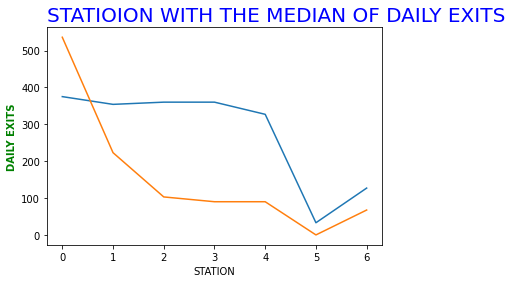

In [ ]:
plt.plot(SQL_query3["DAILY_ENTRIES"])
plt.xlabel('STATION')
plt.ylabel('DAILY ENTRIES',fontsize = 10, weight = 'bold',color='green');
plt.title('STATIOION WITH THE MEDIAN OF DAILY ENTRIES',family='STATIONS',fontsize = 20,loc='left',color='O');


plt.plot(SQL_query3["DAILY_EXITS"])
plt.xlabel('STATION')
plt.ylabel('DAILY EXITS',fontsize = 10, weight = 'bold',color='green');
plt.title('STATIOION WITH THE MEDIAN OF DAILY EXITS',family='STATIONS',fontsize = 20,loc='left',color='b');